In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from skimage.io import imread

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
from pylab import imshow
rcParams['figure.figsize'] = 6, 3

In [2]:
image = imread('data/parrots.jpg')

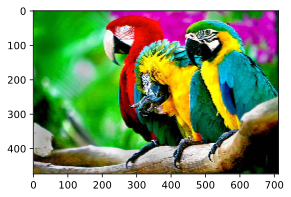

In [3]:
imshow(image)

In [4]:
from skimage import img_as_float

In [5]:
img = img_as_float(image)
w, h, d = img.shape

In [6]:
x = img.reshape((w * h, d))

In [7]:
def psnr(img1, img2):
    return 10 * np.log10(1.0 / np.mean((img1 - img2)**2))

for n in range(1, 21):
    data = pd.DataFrame(x)
    model = KMeans(n_clusters=n, random_state=241, init='k-means++')
    clusters = model.fit_predict(data)
    data['Clusters'] = clusters
    data.columns = ['R', 'G', 'B', 'Cluster']

    data['R_mean'] = np.nan
    data['G_mean'] = np.nan
    data['B_mean'] = np.nan
    data['R_median'] = np.nan
    data['G_median'] = np.nan
    data['B_median'] = np.nan

    means = data.groupby('Cluster')[['R', 'G', 'B']].mean().values
    for cl in range(n):
        data.loc[data['Cluster'] == cl, 'R_mean':'B_mean'] = means[cl]

    medians = data.groupby('Cluster')[['R', 'G', 'B']].median().values
    for cl in range(n):
        data.loc[data['Cluster'] == cl, 'R_median':'B_median'] = medians[cl]

    mean_img = data.loc[:, 'R_mean':'B_mean'].values.reshape((w, h, d))
    median_img = data.loc[:, 'R_median':'B_median'].values.reshape((w, h, d))
    
    mean_score = psnr(img, mean_img)
    median_score = psnr(img, median_img)
    
    if mean_score > 20 or median_score > 20:
        print(n)
        break

11
